In [1]:
%pip install pandas seaborn matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.


Matplotlib is building the font cache; this may take a moment.


Veri seti yükleniyor...


/var/folders/5h/qv2s5s1d7sd_x2xrv6b0gpdw0000gn/T/ipykernel_15602/4079895434.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diagnosis', data=df, palette='viridis')


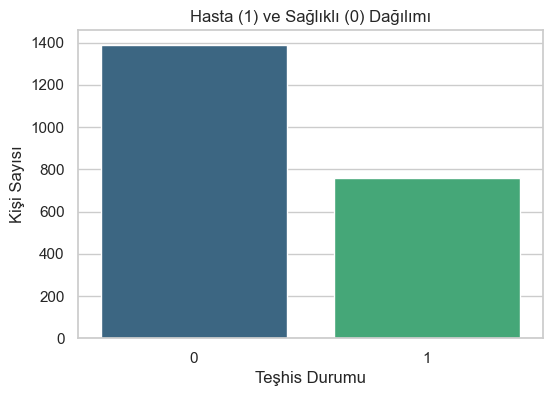

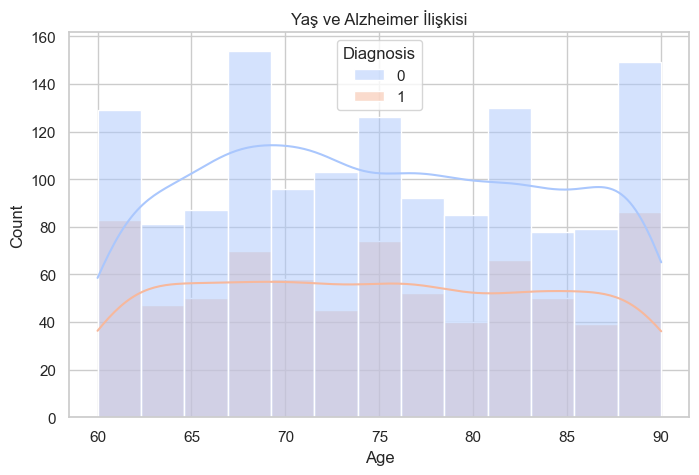

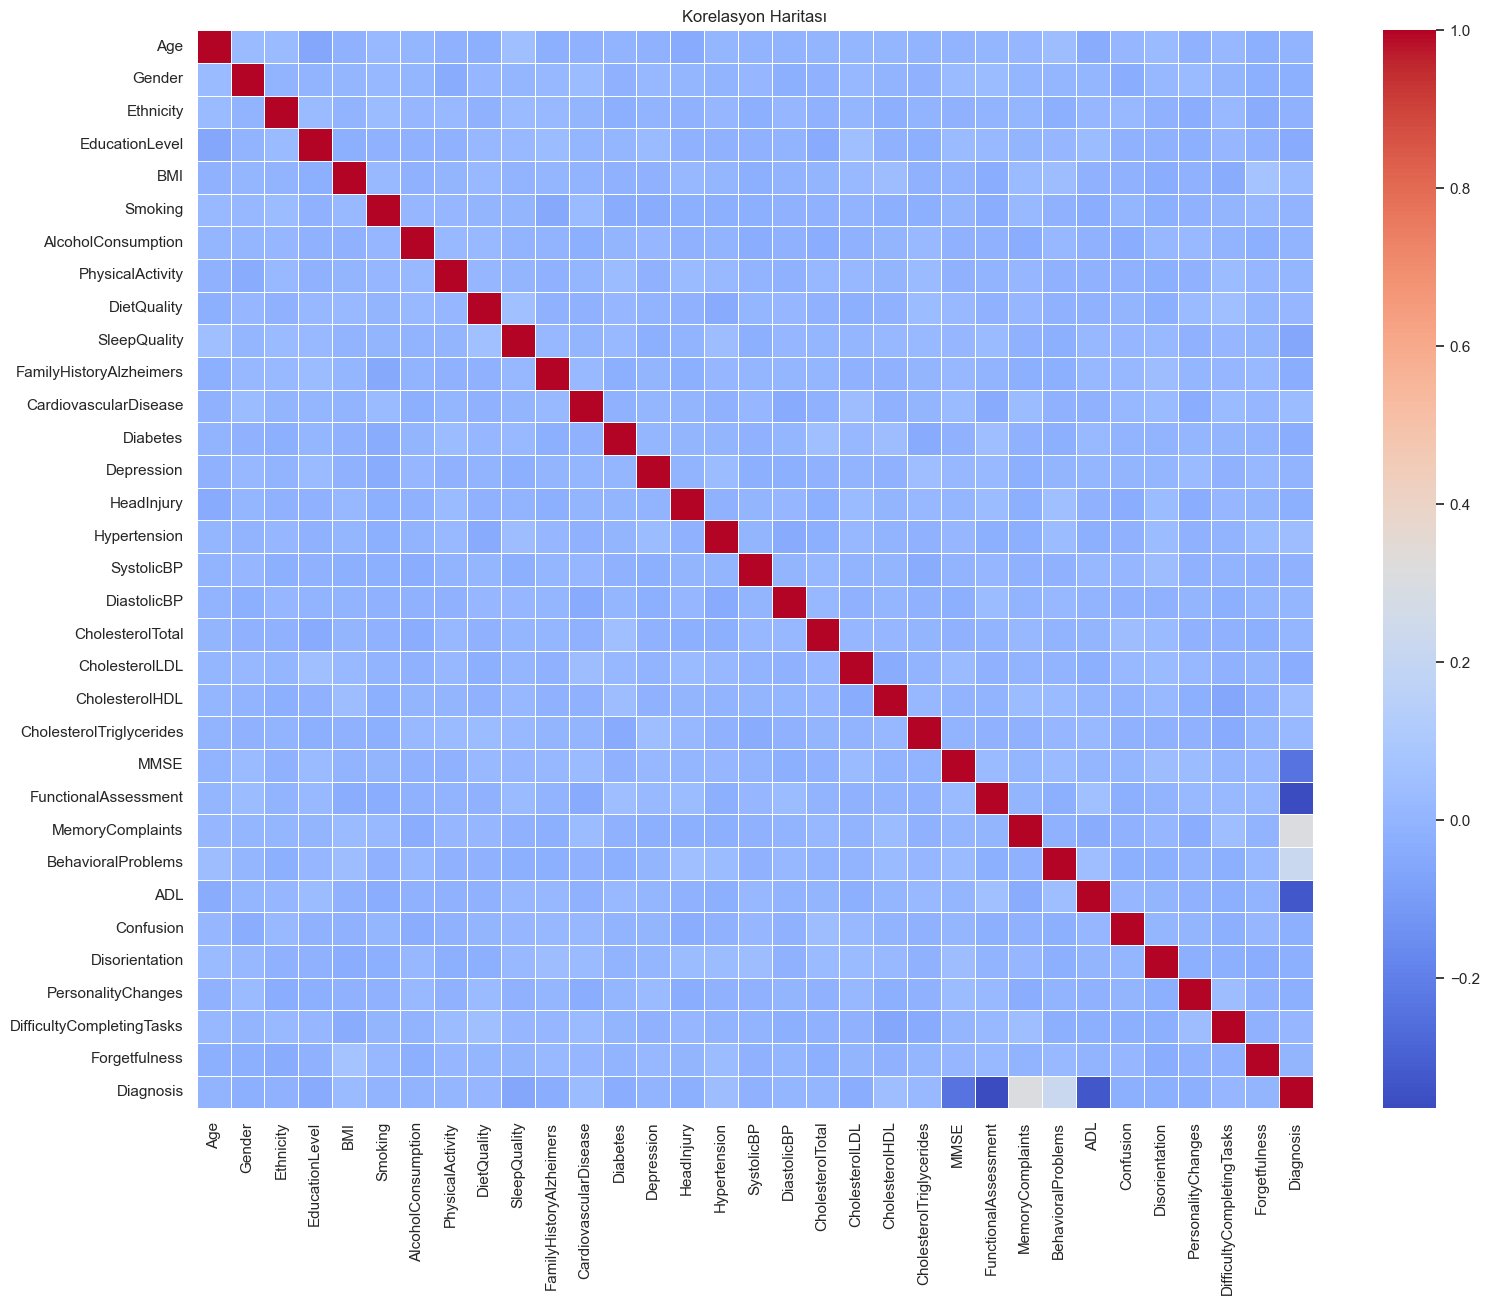


Modeller eğitiliyor, lütfen bekleyin...

--- Lojistik Regresyon ---
Başarı Oranı: %83.02
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       277
           1       0.79      0.71      0.75       153

    accuracy                           0.83       430
   macro avg       0.82      0.80      0.81       430
weighted avg       0.83      0.83      0.83       430



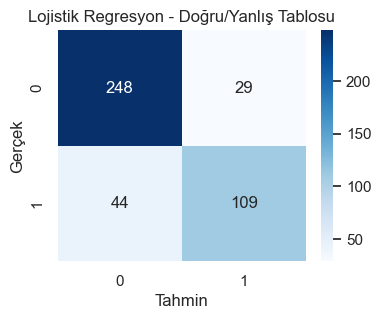

--- Random Forest ---
Başarı Oranı: %92.56
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       277
           1       0.96      0.82      0.89       153

    accuracy                           0.93       430
   macro avg       0.94      0.90      0.92       430
weighted avg       0.93      0.93      0.92       430



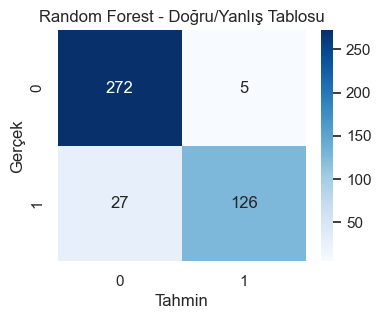

--- Gradient Boosting ---
Başarı Oranı: %95.81
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       277
           1       0.96      0.92      0.94       153

    accuracy                           0.96       430
   macro avg       0.96      0.95      0.95       430
weighted avg       0.96      0.96      0.96       430



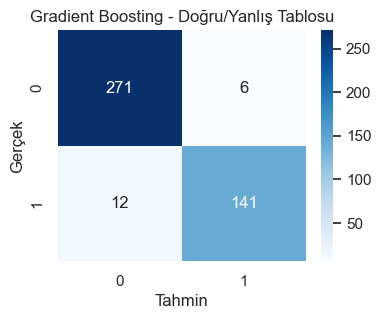

------------------------------
🏆 KAZANAN MODEL: Gradient Boosting (Başarı: %95.81)
------------------------------


/var/folders/5h/qv2s5s1d7sd_x2xrv6b0gpdw0000gn/T/ipykernel_15602/4079895434.py:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(sonuclar.keys()), y=list(sonuclar.values()), palette='magma')


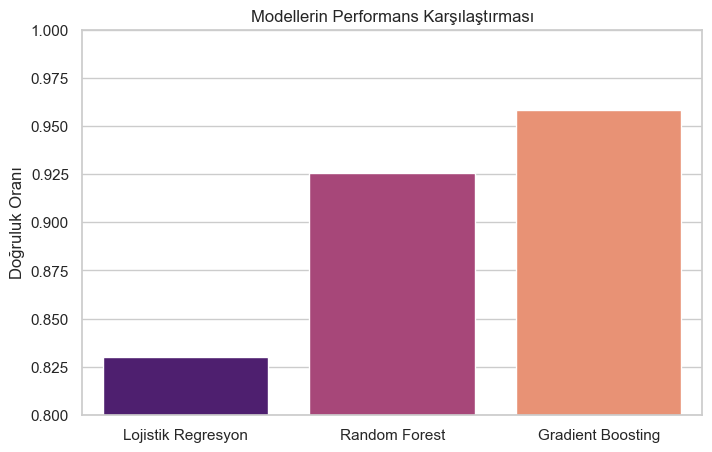

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --- AYARLAR ---
# Grafiklerin güzel görünmesi için stil ayarı
sns.set(style="whitegrid")

# 1. VERİYİ YÜKLE
print("Veri seti yükleniyor...")
df = pd.read_csv('alzheimers_disease_data.csv')

# Gereksiz sütunları at (ID ve Doktor ismi)
df = df.drop(columns=['PatientID', 'DoctorInCharge'], errors='ignore')

# 2. KEŞİFSEL VERİ ANALİZİ (EDA) - Raporluk Grafikler

# Grafik 1: Hasta vs Sağlıklı Sayısı
plt.figure(figsize=(6, 4))
sns.countplot(x='Diagnosis', data=df, palette='viridis')
plt.title('Hasta (1) ve Sağlıklı (0) Dağılımı')
plt.xlabel('Teşhis Durumu')
plt.ylabel('Kişi Sayısı')
plt.savefig('grafik1_hasta_dagilimi.png') # Resmi kaydeder
plt.show()

# Grafik 2: Yaş Dağılımı
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Age', hue='Diagnosis', kde=True, palette='coolwarm')
plt.title('Yaş ve Alzheimer İlişkisi')
plt.savefig('grafik2_yas_analizi.png')
plt.show()

# Grafik 3: Korelasyon Haritası (Özellikler arası ilişki)
plt.figure(figsize=(18, 14))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Korelasyon Haritası')
plt.savefig('grafik3_korelasyon.png')
plt.show()

# 3. MAKİNE ÖĞRENMESİ HAZIRLIĞI
X = df.drop(columns=['Diagnosis'])  # Girdi verileri
y = df['Diagnosis']                 # Hedef (Hasta mı değil mi?)

# Veriyi böl (%80 Eğitim, %20 Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veriyi Standartlaştır (Modellerin daha iyi çalışması için)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. MODELLERİ KUR VE YARIŞTIR
print("\nModeller eğitiliyor, lütfen bekleyin...\n")

modeller = {
    "Lojistik Regresyon": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

sonuclar = {}

for isim, model in modeller.items():
    # Modeli eğit
    model.fit(X_train_scaled, y_train)
    
    # Tahmin yap
    y_pred = model.predict(X_test_scaled)
    
    # Başarıyı ölç
    basari = accuracy_score(y_test, y_pred)
    sonuclar[isim] = basari
    
    print(f"--- {isim} ---")
    print(f"Başarı Oranı: %{basari * 100:.2f}")
    print(classification_report(y_test, y_pred))
    
    # Grafik: Confusion Matrix (Her model için)
    plt.figure(figsize=(4, 3))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'{isim} - Doğru/Yanlış Tablosu')
    plt.ylabel('Gerçek')
    plt.xlabel('Tahmin')
    plt.show()

# 5. KARŞILAŞTIRMA SONUCU
print("-" * 30)
en_iyi_model = max(sonuclar, key=sonuclar.get)
print(f"🏆 KAZANAN MODEL: {en_iyi_model} (Başarı: %{sonuclar[en_iyi_model]*100:.2f})")
print("-" * 30)

# Grafik 4: Modellerin Karşılaştırma Tablosu
plt.figure(figsize=(8, 5))
sns.barplot(x=list(sonuclar.keys()), y=list(sonuclar.values()), palette='magma')
plt.title('Modellerin Performans Karşılaştırması')
plt.ylim(0.8, 1.0) # Grafiği 0.8 ile 1.0 arasına odaklar
plt.ylabel('Doğruluk Oranı')
plt.savefig('grafik4_model_karsilastirma.png')
plt.show()

C:\Users\fidan\AppData\Local\Temp\ipykernel_25252\3651139943.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Önem Derecesi', y='Özellik', data=onem_df, palette='viridis')


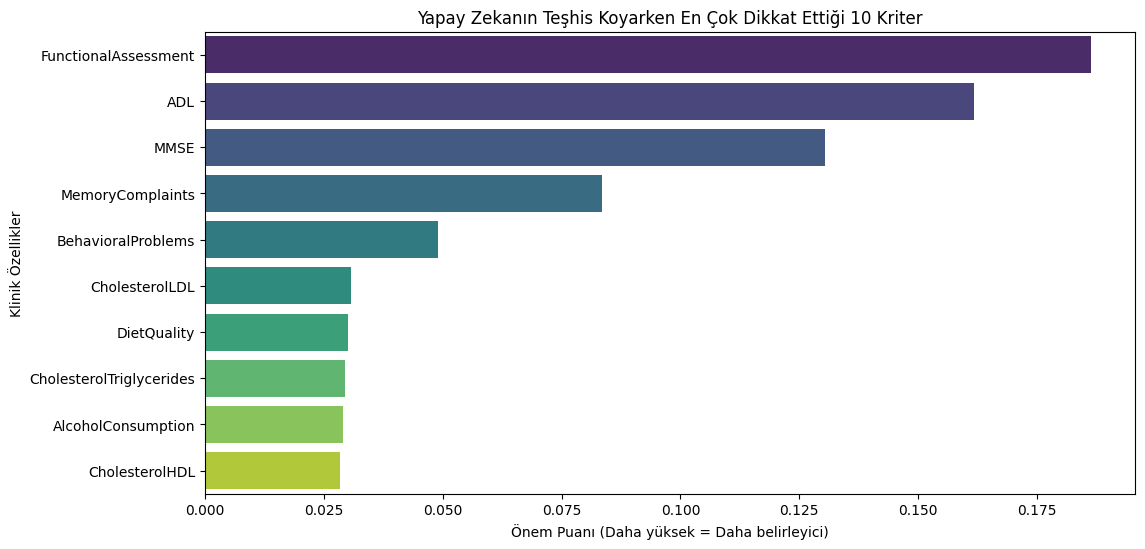

Modelin En Çok Önemsediği 5 Kriter:
                 Özellik  Önem Derecesi
23  FunctionalAssessment       0.186323
26                   ADL       0.161846
22                  MMSE       0.130414
24      MemoryComplaints       0.083550
25    BehavioralProblems       0.048912


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# 1. Veriyi Tekrar Hazırla (Garanti olsun diye)
df = pd.read_csv('alzheimers_disease_data.csv')
X = df.drop(columns=['PatientID', 'DoctorInCharge', 'Diagnosis'], errors='ignore')
y = df['Diagnosis']

# 2. Modeli Eğit (Eğer eğitilmiş modelin hafızadan silindiyse diye tekrar eğitiyoruz)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# 3. Özellik Önemlerini Al
onem_dereceleri = model.feature_importances_
ozellik_isimleri = X.columns

# 4. Tabloya Çevir ve Sırala
onem_df = pd.DataFrame({'Özellik': ozellik_isimleri, 'Önem Derecesi': onem_dereceleri})
onem_df = onem_df.sort_values(by='Önem Derecesi', ascending=False).head(10) # En iyi 10 tanesi

# 5. Havalı Grafiği Çiz
plt.figure(figsize=(12, 6))
sns.barplot(x='Önem Derecesi', y='Özellik', data=onem_df, palette='viridis')
plt.title('Yapay Zekanın Teşhis Koyarken En Çok Dikkat Ettiği 10 Kriter')
plt.xlabel('Önem Puanı (Daha yüksek = Daha belirleyici)')
plt.ylabel('Klinik Özellikler')
plt.show()

# Listeyi de yazdıralım
print("Modelin En Çok Önemsediği 5 Kriter:")
print(onem_df.head(5))